In [1]:
#from numpy import arange
#from pandas import read_csv
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from glob import glob
from tqdm import tqdm
from scipy.signal import find_peaks

In [2]:
raw_in='../Input/raw/'
base_in='../Input/Prep/Script1/'
base_out='../Output/Script1/Results/'
fig_path='../Output/Script1/Reports/'
glob(base_in+'**')

['../Input/Prep/Script1\\all_meth_feat.csv',
 '../Input/Prep/Script1\\dt_exp_fitting.p',
 '../Input/Prep/Script1\\dt_exp_fitting_extended.p',
 '../Input/Prep/Script1\\ensemble_feat_meth.csv',
 '../Input/Prep/Script1\\feature_all(log_trans).p',
 '../Input/Prep/Script1\\feature_all.p',
 '../Input/Prep/Script1\\feature_p_set_exp_log(p_5).p',
 '../Input/Prep/Script1\\feature_p_set_meth_log(p_0.5).p',
 '../Input/Prep/Script1\\feature_p_set_meth_log(p_0.5).xlsx',
 '../Input/Prep/Script1\\feature_p_set_meth_log(p_5).p',
 '../Input/Prep/Script1\\model_tuning_red_feat_exp.p',
 '../Input/Prep/Script1\\model_tuning_red_feat_meth.p',
 '../Input/Prep/Script1\\svm_feature.csv',
 '../Input/Prep/Script1\\TCGA_FDR_feat_(a_0.1).csv',
 '../Input/Prep/Script1\\tcga_gene.csv',
 '../Input/Prep/Script1\\TCGA_kbest_feat_(k_1000).csv',
 '../Input/Prep/Script1\\tcga_meth_site.csv',
 '../Input/Prep/Script1\\tcga_mut_site.csv',
 '../Input/Prep/Script1\\TCGA_percentile_feat_(p_0.5).csv',
 '../Input/Prep/Script1\\T

In [3]:

 
# define the true objective function
def objective(x, a, b, c, d, e, f):
    return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f
 

In [13]:
#Fit function required to obtain the curve 
def my_fit(objective, x, y,fig_name):
    popt, _ = curve_fit(objective, x, y)
    # summarize the parameter values
    a, b, c, d, e, f = popt
    # plot input vs output
    plt.figure(figsize=(15, 10))
    plt.rcParams['font.size'] = '36'
    plt.scatter(x, y)
    # define a sequence of inputs between the smallest and largest known inputs
    x_line = np.arange(min(x), max(x), 1)
    # calculate the output for the range
    y_line = objective(x_line, a, b, c, d, e, f)
    # create a line plot for the mapping function
    
    #plt.ylim(0, 1)
    plt.plot(x_line, y_line, '--', color='red')
    plt.xticks(np.arange(0, 1100, 100))
    plt.yticks(np.arange(0, 1.1, .1))
    plt.xticks(rotation = 45)
    plt.grid()
    plt.savefig(fig_name,dpi=300)
    
    #return ret

# To run the below exercises:-
* Two column feature score file (Score column should be named Mean)
* File format is xlsx


## Each cell has been run using a differnt score files

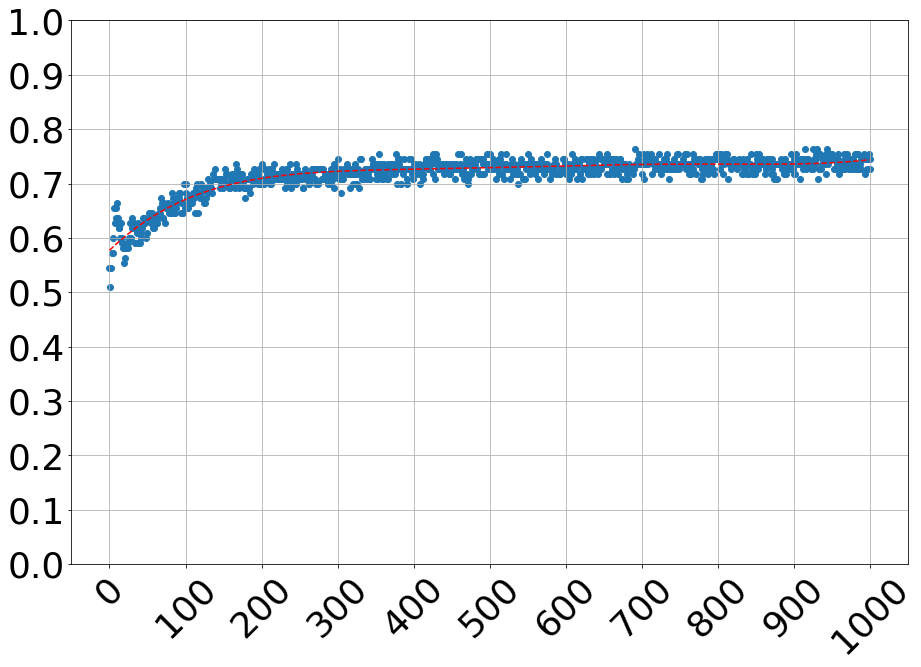

In [14]:
dataframe=pd.read_excel(base_in+'tuned_feature_p_set_exp_log(p_0.5).xlsx',sheet_name='rf')
x = dataframe.index.values
y = dataframe.Mean.values
fig_out=my_fit(objective, x, y,fig_path+'feature_elimination_rf.png')


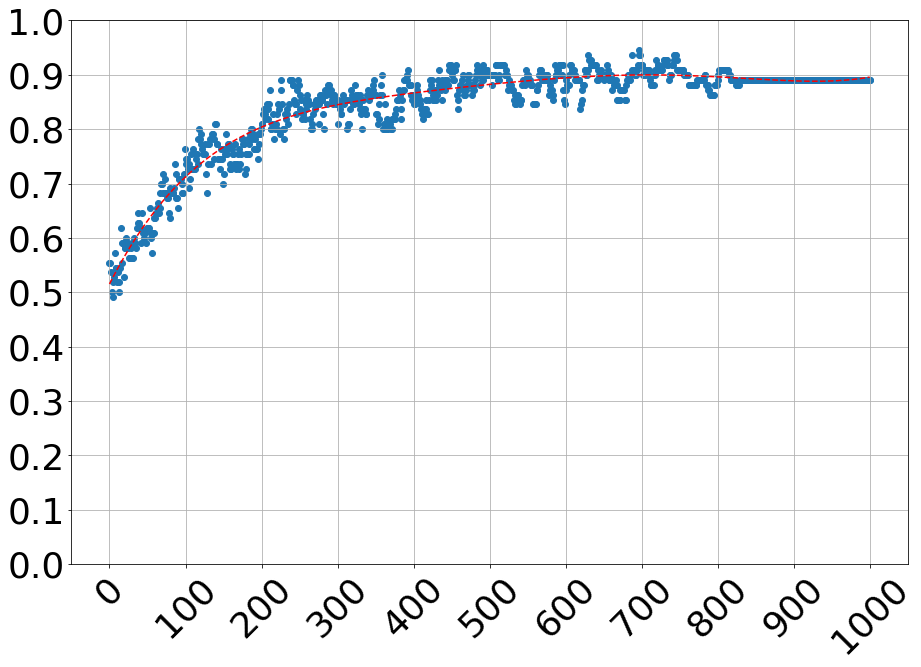

In [15]:
dataframe=pd.read_excel(base_in+'tuned_feature_p_set_exp_log(p_0.5).xlsx',sheet_name='per')
x = dataframe.index.values
y = dataframe.Mean.values
fig_out=my_fit(objective, x, y,fig_path+'feature_elimination_per.png')

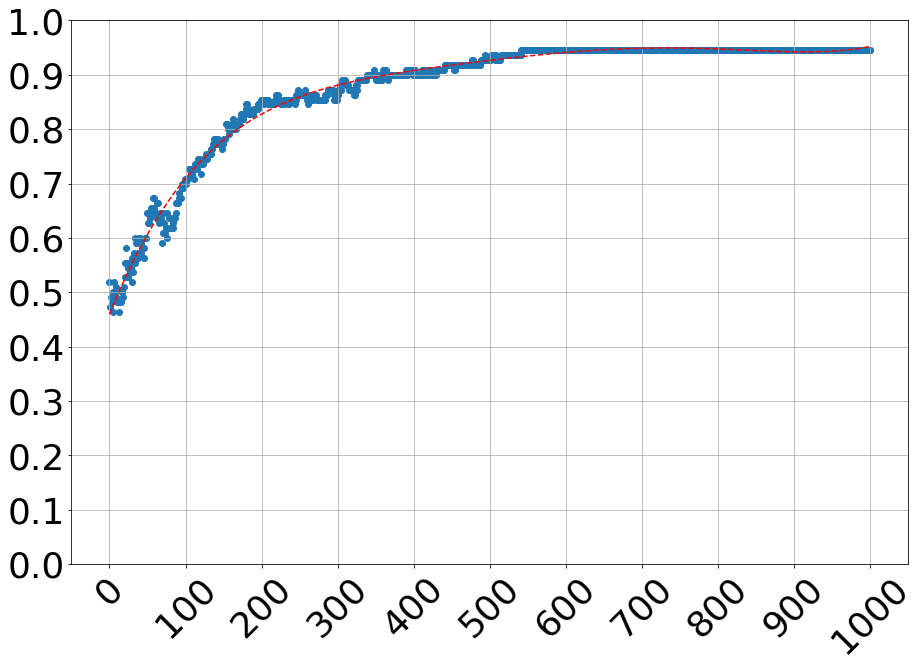

In [16]:
dataframe=pd.read_excel(base_in+'tuned_feature_p_set_exp_log(p_0.5).xlsx',sheet_name='svm')
x = dataframe.index.values
y = dataframe.Mean.values
fig_out=my_fit(objective, x, y,fig_path+'feature_elimination_svm.png')

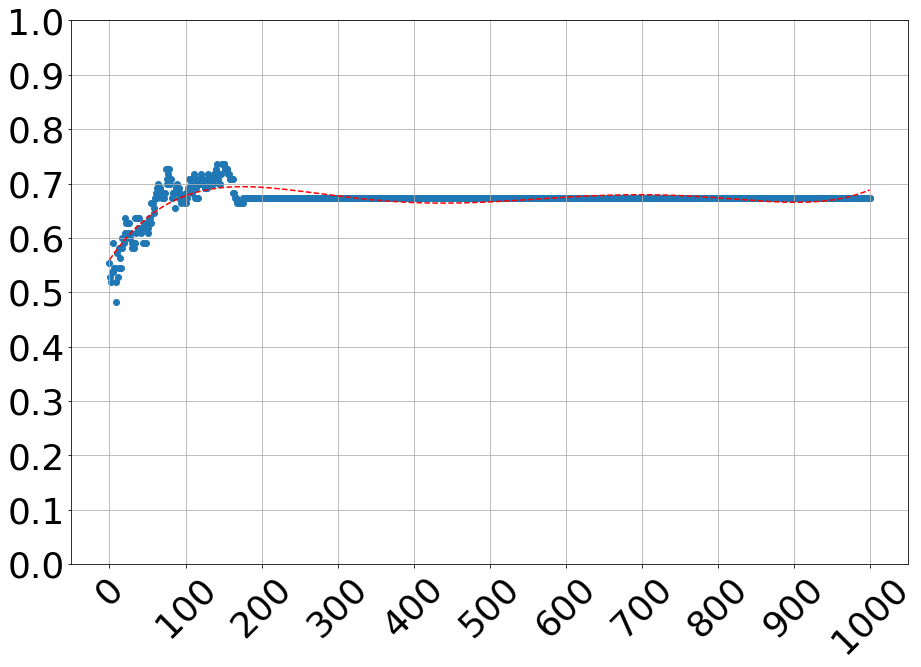

In [17]:
dataframe=pd.read_excel(base_in+'tuned_feature_p_set_exp_log(p_0.5).xlsx',sheet_name='xgb')
x = dataframe.index.values
y = dataframe.Mean.values
fig_out=my_fit(objective, x, y,fig_path+'feature_elimination_xgb.png')

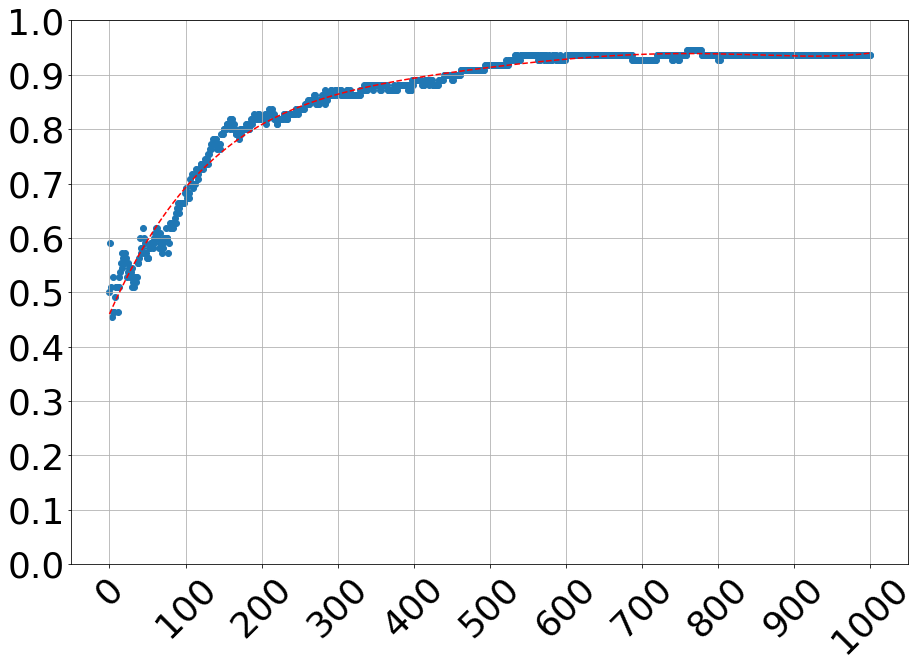

In [18]:
dataframe=pd.read_excel(base_in+'tuned_feature_p_set_exp_log(p_0.5).xlsx',sheet_name='logit')
x = dataframe.index.values
y = dataframe.Mean.values
fig_out=my_fit(objective, x, y,fig_path+'feature_elimination_logit.png')

In [6]:
x = dataframe.index.values
y = dataframe.Mean.values

C:\Users\samrat1\.conda\envs\data_sci\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


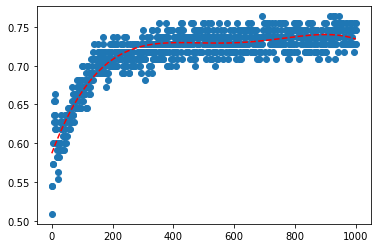

In [18]:
fig_out=my_fit(objective, x, y)


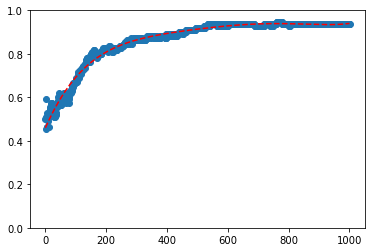

In [17]:
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c, d, e, f = popt
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d, e, f)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.ylim(0, 1)
pyplot.show()

In [8]:
peaks, _ = find_peaks(y_line)
peaks

array([777], dtype=int64)

In [ ]:
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv'
dataframe = pd.read_csv(url, header=None)
data = dataframe.values
# choose the input and output variables
x, y = data[:, 4], data[:, -1]
